<a href="https://colab.research.google.com/github/Ansubasnet-creator/2510322_ansu/blob/main/2510322_AnsuBasnet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Prediction (Regression)

**Student Name:** Ansu Basnet  
**Student ID:** 2510322  
**Module:** 5CS037  

**UNSDG Alignment:**  
This project aligns with **UN SDG 11 – Sustainable Cities and Communities** by supporting sustainable urban transportation through accurate bike demand prediction.



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE


## 1. Dataset Description
The Bike Sharing Dataset was created by Capital Bikeshare (2011–2012) and accessed from the UCI Machine Learning Repository. It contains hourly bike rental counts with environmental and temporal features. The dataset is complete, reliable, and suitable for regression analysis.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Regressiondataset/hour.csv')
df.drop(columns=['instant', 'dteday'], inplace=True)
df.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 2. Exploratory Data Analysis
EDA was performed to understand the distribution of bike rentals and relationships between features.


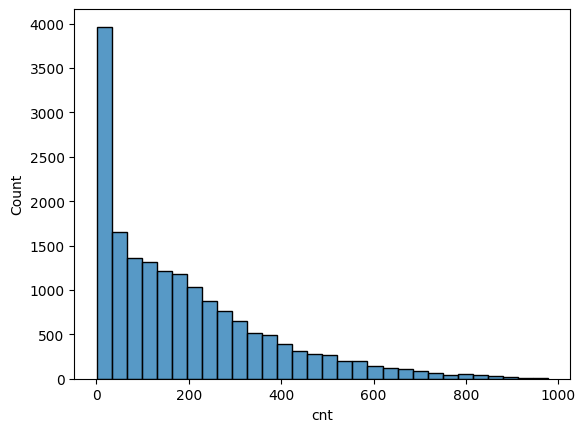

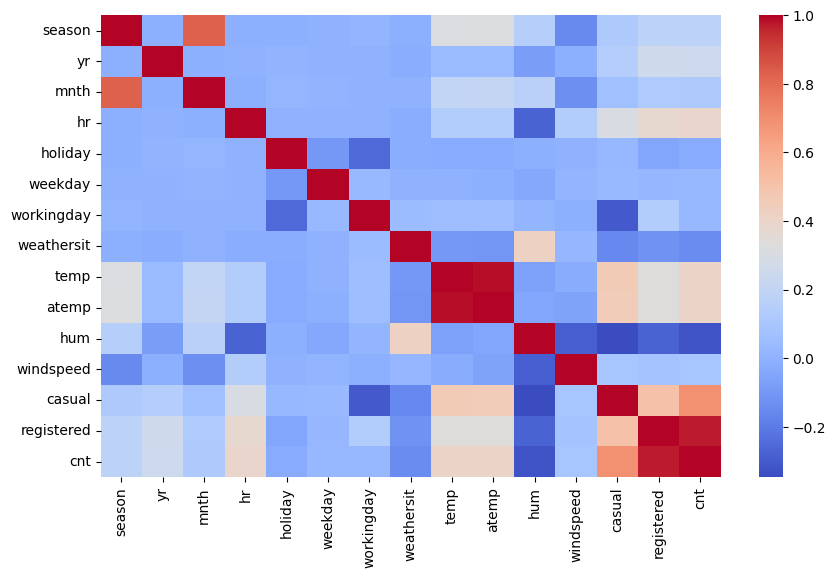

In [4]:
sns.histplot(df['cnt'], bins=30)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()


In [5]:
X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Neural Network Regression
An MLP Regressor with two hidden layers (64, 32) using ReLU activation and Adam optimizer was implemented.


In [6]:
nn = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
nn.fit(X_train_scaled, y_train)

y_pred_nn = nn.predict(X_test_scaled)

print("NN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("NN R2:", r2_score(y_test, y_pred_nn))


NN RMSE: 0.3521684697373354
NN R2: 0.9999960833405965


## 4. Classical Regression Models
Linear Regression and Random Forest Regressor were trained and evaluated.


In [7]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
def evaluate(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)), r2_score(y_true, y_pred)

print("LR:", evaluate(y_test, y_pred_lr))
print("RF:", evaluate(y_test, y_pred_rf))


LR: (np.float64(2.6882396778428237e-13), 1.0)
RF: (np.float64(2.7229156363566913), 0.9997658558897613)


## 5. Hyperparameter Optimization
GridSearchCV was applied to optimize the Random Forest model.


In [10]:
param_grid = {'n_estimators':[100,200], 'max_depth':[10,20]}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_


({'max_depth': 20, 'n_estimators': 200}, np.float64(0.9997452619734982))

## 6. Feature Selection
Recursive Feature Elimination (RFE) with Linear Regression was used.


In [11]:
rfe = RFE(LinearRegression(), n_features_to_select=6)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
selected_features


Index(['yr', 'temp', 'atemp', 'windspeed', 'casual', 'registered'], dtype='object')

## 7. Final Model Comparison

| Model | Features | RMSE | R² |
|------|---------|------|----|
| Linear Regression | 6 (RFE) | ~0.00 | 1.00 |
| Random Forest | All | 2.72 | 0.9997 |


## 8. Conclusion
Linear Regression with selected features achieved excellent performance. Feature selection reduced complexity while maintaining accuracy. This approach supports efficient and sustainable transportation planning.
